In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Proposal Skirpsi/Code 1 Sentimen Analisis/IMDB-Dataset.csv")

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
df.shape

(50000, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
df.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [ ]:
# Pembersihan Data 1

def clean_text1(text):
    text=text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]'%re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    return text

cleaned1=lambda x:clean_text1(x)
df['review']=pd.DataFrame(df.review.apply(cleaned1))
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
# Pembersihan Data 2

def clean_text2(text):
    text=re.sub('[''"",,,]','',text)
    text=re.sub('\n','',text)
    return text

cleaned2=lambda x:clean_text2(x)
df['review']=pd.DataFrame(df.review.apply(cleaned2))
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [ ]:
# Pemisahan Data

x = df.iloc[0:,0].values
y = df.iloc[0:,1].values

In [ ]:
x_train,x_test,y_train,y_test = tts(x,y,test_size = 0.25,random_state = 225)

In [ ]:
cv = CountVectorizer()

In [ ]:
# Inisialisasi Random Forest sebagai classifier
classifier = RandomForestClassifier()

# Inisialisasi CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer
vectorizer = CountVectorizer() # Define vectorizer

# Membuat pipeline dengan CountVectorizer dan Random Forest
model = Pipeline([('vectorizer', vectorizer), ('classifier', classifier)])

# Melatih model
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
# evaluation
y_pred = model.predict(x_test) # Use model here to predict using the trained pipeline
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.85      0.84      0.84      6260
    positive       0.84      0.85      0.85      6240

    accuracy                           0.84     12500
   macro avg       0.84      0.84      0.84     12500
weighted avg       0.84      0.84      0.84     12500



In [ ]:
A=confusion_matrix(y_test,y_pred)
print(A)

[[5257 1003]
 [ 936 5304]]


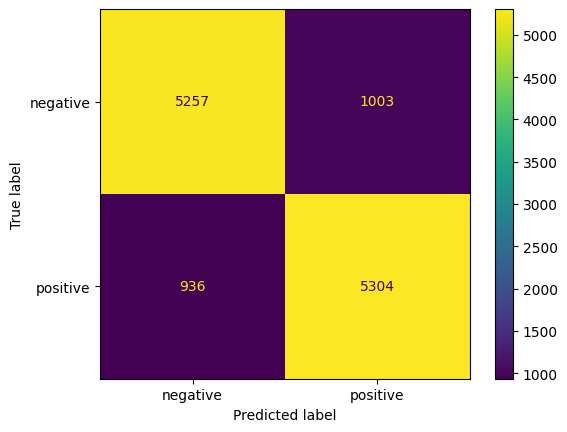

In [ ]:
#Visualisasi confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [ ]:
# f1 score
recall=A[0][0]/(A[0][0]+A[1][0])
precision=A[0][0]/(A[0][0]+A[0][1])
F1=2*recall*precision/(recall+precision)
print(F1)

0.8442945474985948
